- Date 1er déconfinement : 11/05
- Date 1er couvre feu : 17/10
- Date 2e confinement : 29/10


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df_washington = pd.read_csv("data/washington.csv", sep = ";")
# df_convention = pd.read_csv("data/convention.csv", sep = ";")
# df_sts = pd.read_csv("data/sts.csv", sep = ";")

def filter(df,amont,aval):
    df = df[df["Libelle noeud amont"]==amont]
    df = df[df["Libelle noeud aval"]==aval]
    return df

def set_date(df):
    df["Date et heure de comptage"] = pd.to_datetime(df_washington["Date et heure de comptage"],format='%Y-%m-%dT%H:%M:%S%z')
    return df


df_washington = filter(df_washington,"Av_Champs_Elysees-Washington","Av_Champs_Elysees-Berri")
df_washington = set_date(df_washington)
df_washington = df_washington.sort_values(by = "Date et heure de comptage")
df_washington = df_washington.interpolate() #remove Nan by interpolation
df_washington = df_washington.reset_index()
df_washington["date"] = [d.date() for d in df_washington["Date et heure de comptage"]]
# df_sts = filter(df_sts,"Lecourbe-Convention","Convention-Blomet")
# df_convention = filter(df_convention,"Sts_Peres-Voltaire","Sts_Peres-Universite")

df_washington.head(1)

,index,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,date
0,6712,4264,AV_Champs_Elysees,2019-11-01 04:00:00+01:00,746.0,10.98889,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009...",2019-11-01


In [20]:
#######
#features
#######
df_X = pd.DataFrame({"dt": df_washington["Date et heure de comptage"],
                     "debit" : df_washington["Débit horaire"],
                     "occupation" : df_washington["Taux d'occupation"], 
                     "date": df_washington["date"]})
df_X["hour"]= [d.hour for d in df_X["dt"]]
df_X["weekday"]= [d.weekday() for d in df_X["dt"]]
df_X["month"]= [d.month for d in df_X["dt"]]
df_X

,dt,debit,occupation,date,hour,weekday,month
0,2019-11-01 04:00:00+01:00,746.0,10.98889,2019-11-01,4,4,11
1,2019-11-01 05:00:00+01:00,549.0,7.40722,2019-11-01,5,4,11
2,2019-11-01 06:00:00+01:00,503.0,7.66667,2019-11-01,6,4,11
3,2019-11-01 07:00:00+01:00,500.0,4.75500,2019-11-01,7,4,11
4,2019-11-01 08:00:00+01:00,525.0,5.37389,2019-11-01,8,4,11
...,...,...,...,...,...,...,...
9423,2020-11-29 20:00:00+01:00,859.0,13.09667,2020-11-29,20,6,11
9424,2020-11-29 21:00:00+01:00,568.0,7.50778,2020-11-29,21,6,11
9425,2020-11-29 22:00:00+01:00,391.0,4.38000,2020-11-29,22,6,11
9426,2020-11-29 23:00:00+01:00,218.0,2.11500,2020-11-29,23,6,11


### Analyse du couvre feu

#### Nous allons analyser jour de la semaine par jour de la semaine l'effet du couvre feu sur l'allure journalière

On remarque une tendance claire : 
- Le débit pendant la journée est le même 
- A partir de 18/19h, le debit est plus faible pendant le couvre feu
- Le debit pendant la nuit est quasiment nulle avec le couvre feu, pas du tout en temps normal

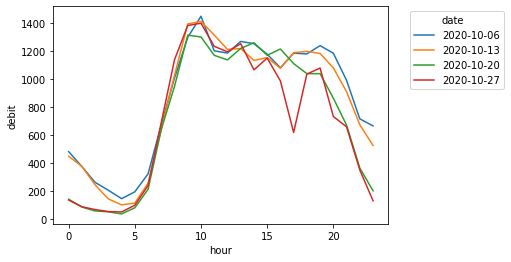

In [51]:
weekday = 1
min_day = datetime.date(2020, 10, 1)
max_day = datetime.date(2020, 10, 27)

df_loc = df_X[(df_X.dt >= min_day) & (df_X.dt <= max_day) & (df_X.weekday == weekday)]
sns.lineplot(data=df_loc, x="hour", y="debit", hue="date")
plt.legend(bbox_to_anchor=(1.05, 1))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


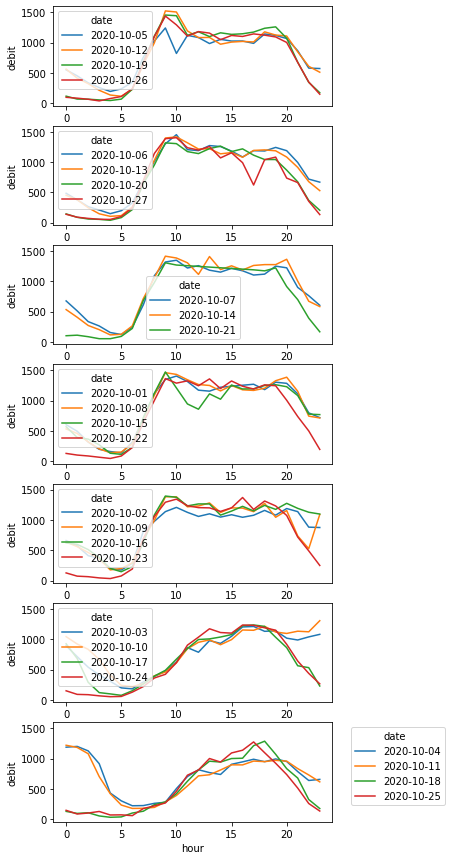

In [44]:
#fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig, axs = plt.subplots(7, figsize=(5, 15), sharey=True)
min_day = datetime.date(2020, 10, 1)
max_day = datetime.date(2020, 10, 27)
for weekday in range(7):
    df_loc = df_X[(df_X.dt >= min_day) & (df_X.dt <= max_day) & (df_X.weekday == weekday)]
    sns.lineplot(ax=axs[weekday], data=df_loc, x="hour", y="debit", hue="date")
    plt.legend(bbox_to_anchor=(1.05, 1))

### Analyse du déconfinement

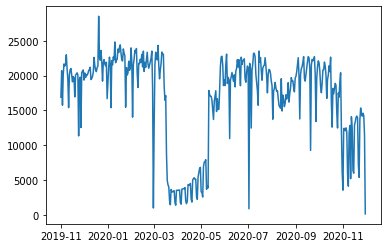

In [68]:
df_loc_grouped = df_X.groupby("date").sum().reset_index()
plt.plot(df_loc_grouped.date,df_loc_grouped.debit)

No handles with labels found to put in legend.


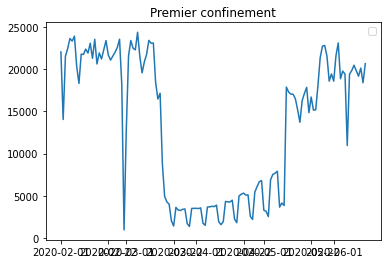

In [71]:
min_day = datetime.date(2020, 2, 1)
max_day = datetime.date(2020, 6, 15)
df_loc = df_X[(df_X.dt >= min_day) & (df_X.dt <= max_day)]
df_loc_grouped = df_loc.groupby("date").sum().reset_index()
plt.plot(df_loc_grouped.date,df_loc_grouped.debit)
plt.title("Premier confinement")
plt.legend()

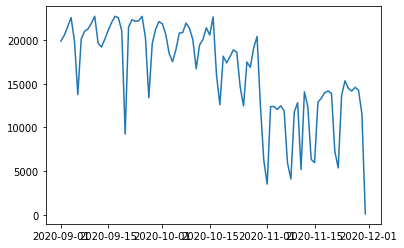

In [72]:
min_day = datetime.date(2020, 9, 1)
max_day = datetime.date(2020, 11, 30)
df_loc = df_X[(df_X.dt >= min_day) & (df_X.dt <= max_day)]
df_loc_grouped = df_loc.groupby("date").sum().reset_index()
plt.plot(df_loc_grouped.date,df_loc_grouped.debit)